<a href="https://colab.research.google.com/github/josh1den/MSDS-Math-in-Python-Bridge/blob/main/Math_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#####**Programming Challenge 1: Even-Odd Vending Machine**
---




Try writing an "even-odd vending machine", which will take a number as input and do two things:

1. Print whether the number is even or odd
2. Display the number followed by the next 9 even or odd numbers 

Your program should use the *is_integer()* method to display an error message if the input is a number with significant digits beyond the decimal point.

In [81]:
def vending(x):
    '''takes an int and prints even or odd'''
    '''prints the following 9 even or odd numbers'''

    try: # check for number
      x = float(x)
      x.is_integer() == True
      x = int(x)

      count = 0 # initialize count
      list = [x] # initialize list with x value
      if x % 2 == 0:
          while count < 9:
              list.append(x+2)
              x += 2
              count += 1
          print("The number is even:")
          print(*list, sep=", ")   
      else:
          while count < 9:
              list.append(x+2)
              x += 2
              count +=1
          print("The number is odd:")
          print(*list, sep=", ")
      
    except ValueError:
      print("Invalid entry. Please enter a number")

In [82]:
vending(2)

The number is even:
2, 4, 6, 8, 10, 12, 14, 16, 18, 20


---
#####**Programming Challenge 2: Exploring a Quadratic Function Visually**
---



Your programming challenge is to enhance this program to create a graph of the function. Try using at least 10 values for x instead of the 6 above. Calculate the corresponding y values using the function and then create a graph using these two sets of values.

Once you’ve created the graph, spend some time analyzing how the value of y varies with respect to x. Is the variation linear or nonlinear?

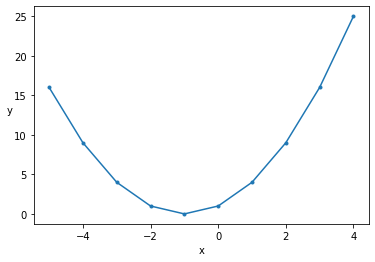

In [4]:
# Enhance this program to create a graph of the function using 10 values for x
import matplotlib.pyplot as plt

# assume values of x
x_values = list(range(-5,5))
x_values

# initialize list of y_values
y_values = []

for x in x_values:
    # calculate the value of the quadratic function
    y_values.append(x**2 + 2*x + 1)  
    
plt.plot(x_values, y_values, marker=".")
plt.xlabel("x")
plt.ylabel("y", rotation=0);

> The parabola indicates a nonlinear relationship between x and y

---
#####**Programming Challenge 3: Statistics Calculator**
---



Implement a statistics calculator that takes a list of numbers in the file mydata.txt and then calculates and prints their mean, median, mode, variance, and standard deviation using the functions we wrote earlier in this chapter.

In [6]:
# import packages
from statistics import mean, median, mode, variance, stdev
from collections import Counter 

In [7]:
# file url
file = "/content/drive/MyDrive/Colab Notebooks/mydata.txt"

In [8]:
def calculator(file):
    # find the mean, median, mode, variance, and standard deviation
    # of numbers stored in a file
    numbers = []
    with open(file) as f:
        for line in f.readlines():
            numbers.append(int(line))
            
    # calculate mean        
    m1 = mean(numbers)
    # calculate median
    m2 = median(numbers)
    # calculate mode
    c = Counter(numbers)
    freq = c.most_common()
    max_count = freq[0][1]
    modes = []

    for num in freq:
      if num[1] == max_count:
        modes.append(num[0])
    # calculate variance
    v = variance(numbers)
    # calculate standard deviation
    sd = stdev(numbers)
    
    print("Mean:", m1)
    print("Median:", m2)
    print("Mode(s):", modes)
    print("Variance:", v)
    print("Standard Deviation:", sd)

In [9]:
calculator(file)

Mean: 477.75
Median: 500.0
Mode(s): [100, 500]
Variance: 153869.8409090909
Standard Deviation: 392.26246431323364




---


#####**Programming Challenge 4: Solving Single-Variable Inequalities**


---







For this challenge, create a function, isolve(), that will take any inequality, solve it, and then return the solution.

In [10]:
from sympy import *

In [27]:
def isolve():
  '''
  takes an inequality and returns a solution
  '''
  inequality = input("Please enter an inequality:")
  try:
    inequality = sympify(inequality)
  except SympifyError:
    print("Invalid inequality")

  x = Symbol("x")  

  expr = inequality.lhs

  # check if expression is a polynomial
  if expr.is_polynomial() == True:
    p = Poly(expr, x)
    rel = inequality.rel_op
    print("This is a polynomial inequality")
    return solve_poly_inequality(p, rel)
  # if not polynomial, check for rational inequality
  elif expr.is_rational_function() == True:
    p1, p2 = expr.as_numer_denom()
    num = Poly(p1)
    dem = Poly(p2)
    rel = inequality.rel_op
    print("This is a rational inequality")
    return solve_rational_inequalities([[((num, dem), rel)]])
  else:
    return solve_univariate_inequality(inequality, x, relational=False)

In [28]:
poly = -x**2 + 4 < 0
isolve()


Please enter an inequality:-x**2 + 4 < 0
This is a polynomial inequality


[Interval.open(-oo, -2), Interval.open(2, oo)]

In [29]:
rational = ((x-1)/(x+2)) > 0
isolve()

Please enter an inequality:((x-1)/(x+2)) > 0
This is a rational inequality


Union(Interval.open(-oo, -2), Interval.open(1, oo))

In [30]:
univariate = sin(x) - 0.6 > 0
isolve()

Please enter an inequality:sin(x) - 0.6 > 0


Interval.open(0.643501108793284, -0.643501108793284 + pi)



---


#####**Programming Challenge 5: Law of Large Numbers**


---




According to the law of large numbers, the average value of results over multiple trials approaches the expected value as the number of trials increases. 

Your challenge in this task is to verify this law when rolling a six-sided die for the following number of trials: 100, 1000, 10000, 100000, and 500000.

In [31]:
import random
from statistics import *

# expected value of a dice roll
e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)

# list of desired number of rolls
trials = [100, 1000, 10000, 100000, 500000]

def roll(trials):
  '''
  takes a list of desired number of rolls and outputs the mean roll per 
  number of rolls
  '''
  results = []

  print("Expected value:", e)

  for trial in trials:
    for t in range(trial):
      results.append(random.randint(1,6))
    avg = mean(results)
    print("Trials: {0}, Trial Average: {1}".format(trial, avg))

In [32]:
roll(trials)

Expected value: 3.5
Trials: 100, Trial Average: 3.24
Trials: 1000, Trial Average: 3.56
Trials: 10000, Trial Average: 3.492972972972973
Trials: 100000, Trial Average: 3.49995499549955
Trials: 500000, Trial Average: 3.499165439371625




---


#####**Programming Challenge 6: Implement the Gradient Descent**


---



Implement a generic program using the gradient descent algorithm to find the minimum value of a single-variable function specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before finding the minimum.

Enter a function in one variable: 25*25*sin(2*theta)/9.8
Enter the variable to differentiate with respect to: theta
Enter the initial value of the variable: 0.001


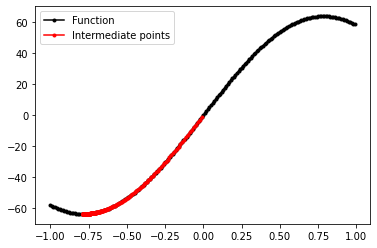

theta: -0.785360851298204
Minimum value: -63.7755100265060


In [51]:
from sympy import Derivative, Symbol, sympify, solve
import numpy as np
import matplotlib.pyplot as plt

def grad_descent(xO, f1x, x):
    
  epsilon = 1e-6
  step_size = 1e-4
  x_old = xO
  x_new = x_old-step_size*f1x.subs({x: x_old}).evalf()

  # store x-values traversed
  x_traversed = []
  while abs(x_old-x_new) > epsilon:
    x_traversed.append(x_new)
    x_old = x_new
    x_new = x_old-step_size*f1x.subs({x:x_old}).evalf()
    
  return x_new, x_traversed

def grad_plot(x_traversed, f, var):
  # create a range of x values to plot against the function
  x_vals = np.arange(-1, 1, 0.01).tolist()
  # create a list of y values based for the given function
  f_vals = []
  for x in x_vals:
    f_vals.append(f.subs({var:x}))
  # plot the function
  plt.plot(x_vals, f_vals, marker='.', color='black')
  # create a list of y values based on the intermediate points traversed
  f_traversed = []
  for x in x_traversed:
    f_traversed.append(f.subs({var:x}))
  # plot the traversed points
  plt.plot(x_traversed, f_traversed, marker='.', color='red')
  plt.legend(['Function', 'Intermediate points'])
  plt.show()
   
if __name__ == '__main__':
  f = input('Enter a function in one variable: ')
  var = input('Enter the variable to differentiate with respect to: ')
  varO = float(input('Enter the initial value of the variable: '))
  try:
    f = sympify(f)
  except SympifyError:
    print('Invalid function entered')
  else:
    var = Symbol(var)
    d = Derivative(f, var).doit()
    var_min, x_traversed = grad_descent(varO, d, var)
    grad_plot(x_traversed, f, var)
    print('{0}: {1}'.format(var.name, var_min))
    print('Minimum value: {0}'.format(f.subs({var: var_min})));